# Question 1

### Preprocessing

In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv('EWCS_2016.csv')

# Drop nan rows
df = df.replace(-999, np.nan)
df = df.dropna()

### Output

### Histogram of each variable

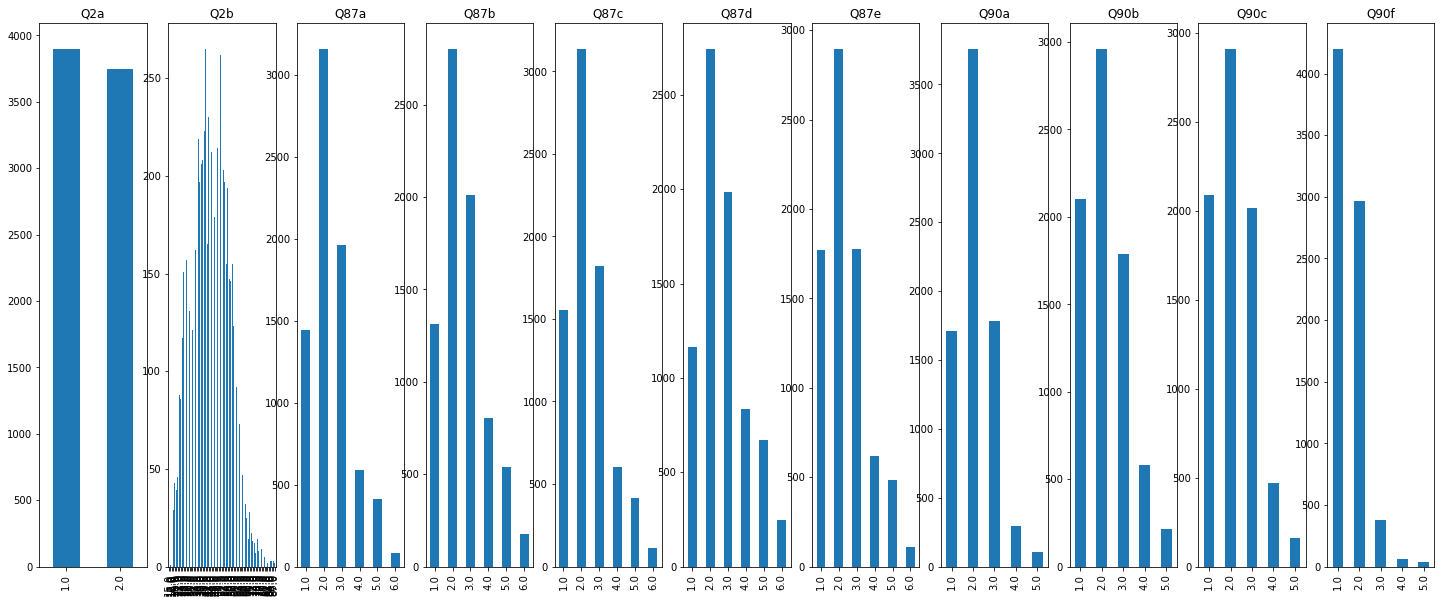

In [355]:
fig, axes = plt.subplots(ncols=len(df.columns), figsize=(25,10))
for col, ax in zip(df, axes):
    df[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

plt.show()

### Unsupervised correlation matrix

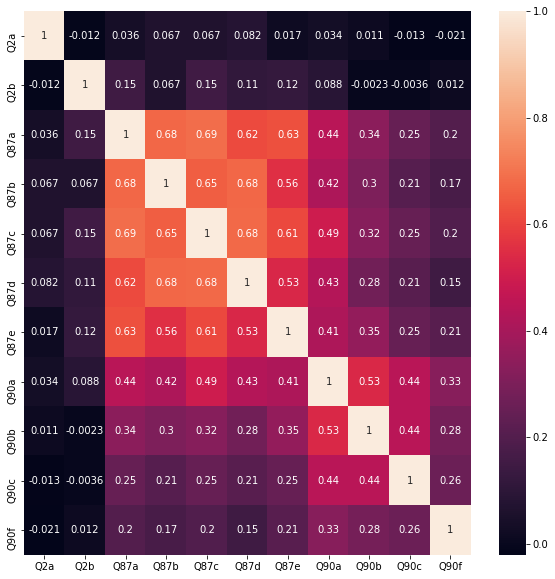

In [356]:
figure(figsize=(10, 10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### PCA

Text(0, 0.5, 'Cumulative explained variance')

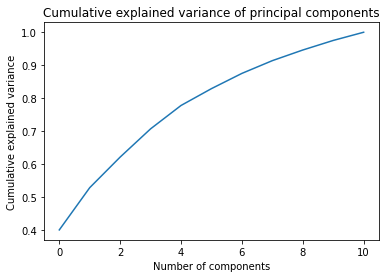

In [375]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standard scaling the data
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

# Fitting scaled data to PCA
pca = PCA(n_components=11)
pca_df = pca.fit_transform(scaled_df)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance of principal components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

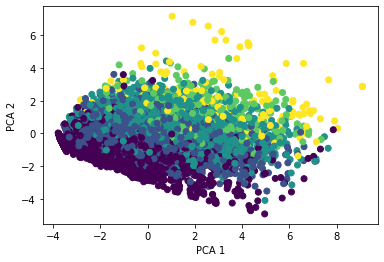

In [391]:
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=df['Q90a'])

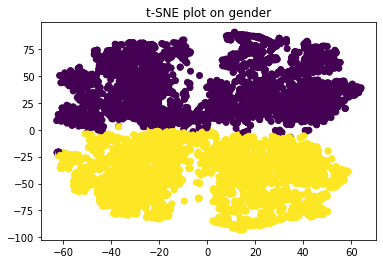

In [406]:
from sklearn.manifold import TSNE

# TSNE the dataset
tsne = TSNE()
X_embedded = tsne.fit_transform(pca_df)
plt.title('t-SNE plot on gender')
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df['Q2a'])

# Question 2

### Data preprocessing

In [306]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm


df1 = pd.read_csv('student-mat.csv', sep=';')
df2 = pd.read_csv('student-por.csv', sep=';')

score_df1 = {}
score_df2 = {}

In [307]:
def preprocessing(df):
    
    df = df.drop(['G1', 'G2'], axis=1)
    
    one_hot_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',  'Fjob', 'reason', 'guardian', 
                    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

    # Encoding different columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('one_hot', OneHotEncoder(handle_unknown='ignore'), one_hot_cols),
        ],remainder='passthrough')

    df = preprocessor.fit_transform(df)

    df = shuffle(df)
    
    df_train = df[:len(df)//10*8]
    df_test = df[len(df)//10*8+1:]

    X_train = df_train[:, :-1]
    y_train = df_train[:, -1]

    X_test = df_test[:, :-1]
    y_test = df_test[:, -1]
    
    return X_train, y_train, X_test, y_test

### Linear regression

In [310]:
X_train_df1, y_train_df1, X_test_df1, y_test_df1 = preprocessing(df1)
X_train_df2, y_train_df2, X_test_df2, y_test_df2 = preprocessing(df2)

clf = make_pipeline(StandardScaler(), LinearRegression())
clf.fit(X_train_df1, y_train_df1)
score_df1['LR'] = mean_squared_error(clf.predict(X_test_df1), y_test_df1)
clf.fit(X_train_df2, y_train_df2)
score_df2['LR'] = mean_squared_error(clf.predict(X_test_df2), y_test_df2)

### Ridge

In [311]:
X_train_df1, y_train_df1, X_test_df1, y_test_df1 = preprocessing(df1)
X_train_df2, y_train_df2, X_test_df2, y_test_df2 = preprocessing(df2)

clf = make_pipeline(StandardScaler(), Ridge())
clf.fit(X_train_df1, y_train_df1)
score_df1['Ridge'] = mean_squared_error(clf.predict(X_test_df1), y_test_df1)
clf.fit(X_train_df2, y_train_df2)
score_df2['Ridge'] = mean_squared_error(clf.predict(X_test_df2), y_test_df2)

### Lasso

In [312]:
X_train_df1, y_train_df1, X_test_df1, y_test_df1 = preprocessing(df1)
X_train_df2, y_train_df2, X_test_df2, y_test_df2 = preprocessing(df2)

clf = make_pipeline(StandardScaler(), Lasso())
clf.fit(X_train_df1, y_train_df1)
score_df1['Lasso'] = mean_squared_error(clf.predict(X_test_df1), y_test_df1)
clf.fit(X_train_df2, y_train_df2)
score_df2['Lasso'] = mean_squared_error(clf.predict(X_test_df2), y_test_df2)

### Elastic Net

In [313]:
X_train_df1, y_train_df1, X_test_df1, y_test_df1 = preprocessing(df1)
X_train_df2, y_train_df2, X_test_df2, y_test_df2 = preprocessing(df2)

clf = make_pipeline(StandardScaler(), ElasticNet())
clf.fit(X_train_df1, y_train_df1)
score_df1['EN'] = mean_squared_error(clf.predict(X_test_df1), y_test_df1)
clf.fit(X_train_df2, y_train_df2)
score_df2['EN'] = mean_squared_error(clf.predict(X_test_df2), y_test_df2)

### Random Forest Regressor

In [314]:
X_train_df1, y_train_df1, X_test_df1, y_test_df1 = preprocessing(df1)
X_train_df2, y_train_df2, X_test_df2, y_test_df2 = preprocessing(df2)

clf = make_pipeline(StandardScaler(), RandomForestRegressor())
clf.fit(X_train_df1, y_train_df1)
score_df1['RFR'] = mean_squared_error(clf.predict(X_test_df1), y_test_df1)
clf.fit(X_train_df2, y_train_df2)
score_df2['RFR'] = mean_squared_error(clf.predict(X_test_df2), y_test_df2)

### K Nearest Neighbours

In [315]:
X_train_df1, y_train_df1, X_test_df1, y_test_df1 = preprocessing(df1)
X_train_df2, y_train_df2, X_test_df2, y_test_df2 = preprocessing(df2)

clf = make_pipeline(StandardScaler(), KNeighborsRegressor())
clf.fit(X_train_df1, y_train_df1)
score_df1['KNN'] = mean_squared_error(clf.predict(X_test_df1), y_test_df1)
clf.fit(X_train_df2, y_train_df2)
score_df2['KNN'] = mean_squared_error(clf.predict(X_test_df2), y_test_df2)

### XGBoost

In [316]:
X_train_df1, y_train_df1, X_test_df1, y_test_df1 = preprocessing(df1)
X_train_df2, y_train_df2, X_test_df2, y_test_df2 = preprocessing(df2)

clf = make_pipeline(StandardScaler(), XGBRegressor())
clf.fit(X_train_df1, y_train_df1)
score_df1['XGB'] = mean_squared_error(clf.predict(X_test_df1), y_test_df1)
clf.fit(X_train_df2, y_train_df2)
score_df2['XGB'] = mean_squared_error(clf.predict(X_test_df2), y_test_df2)

D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### Artifical neural network

In [317]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam

# Network structure
model = Sequential()

model.add(Dense(input_dim=56, units=50, activation='relu', kernel_initializer="glorot_uniform"))
model.add(Dropout(0.5))
model.add(Dense(units=50, activation='relu', kernel_initializer="glorot_uniform"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='relu', kernel_initializer="glorot_uniform"))

# Compiling model
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Fitting model
history = model.fit(X_train_df1, y_train_df1, batch_size=50, epochs=100)

# Evaluating model
score_df1['ANN'] = model.evaluate(X_test_df1, y_test_df1)[0]

# Fitting model
history = model.fit(X_train_df2, y_train_df2, batch_size=50, epochs=100)

# Evaluating model
score_df2['ANN'] = model.evaluate(X_test_df2, y_test_df2)[0]

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 120.5591 - accuracy: 0.0610
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 108.4677 - accuracy: 0.0541
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 82.6666 - accuracy: 0.0478
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 60.7364 - accuracy: 0.0093
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 47.2042 - accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 46.0941 - accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 55.2064 - accuracy: 0.0000e+00
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 40.2998 - accuracy: 0.0000e+00
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 44.6709 - accuracy: 0.0000e+00
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 43.2066 - accuracy: 0.00

7/7 [==============================] - 0s 1ms/step - loss: 24.1532 - accuracy: 0.0000e+00
Epoch 81/100
7/7 [==============================] - 0s 1ms/step - loss: 26.6365 - accuracy: 0.0000e+00
Epoch 82/100
7/7 [==============================] - 0s 1ms/step - loss: 23.1846 - accuracy: 0.0000e+00
Epoch 83/100
7/7 [==============================] - 0s 1ms/step - loss: 24.7922 - accuracy: 0.0000e+00
Epoch 84/100
7/7 [==============================] - 0s 1ms/step - loss: 25.4859 - accuracy: 0.0000e+00
Epoch 85/100
7/7 [==============================] - 0s 1ms/step - loss: 21.7486 - accuracy: 0.0000e+00
Epoch 86/100
7/7 [==============================] - 0s 1ms/step - loss: 29.1176 - accuracy: 0.0000e+00
Epoch 87/100
7/7 [==============================] - 0s 1ms/step - loss: 24.8128 - accuracy: 0.0000e+00
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 28.6346 - accuracy: 0.0000e+00
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 24.6090 - accu

Epoch 59/100
11/11 [==============================] - 0s 1ms/step - loss: 14.1881 - accuracy: 0.0020
Epoch 60/100
11/11 [==============================] - 0s 1ms/step - loss: 14.9845 - accuracy: 0.0020
Epoch 61/100
11/11 [==============================] - 0s 1ms/step - loss: 13.8966 - accuracy: 0.0020
Epoch 62/100
11/11 [==============================] - 0s 1ms/step - loss: 14.4115 - accuracy: 0.0020
Epoch 63/100
11/11 [==============================] - 0s 1ms/step - loss: 12.6003 - accuracy: 0.0020
Epoch 64/100
11/11 [==============================] - 0s 1ms/step - loss: 13.8838 - accuracy: 0.0020
Epoch 65/100
11/11 [==============================] - 0s 1ms/step - loss: 13.5406 - accuracy: 0.0020
Epoch 66/100
11/11 [==============================] - 0s 1ms/step - loss: 13.1919 - accuracy: 0.0020
Epoch 67/100
11/11 [==============================] - 0s 1ms/step - loss: 13.4932 - accuracy: 0.0020
Epoch 68/100
11/11 [==============================] - 0s 1ms/step - loss: 14.5601 - accurac

### Training loss aganist epoch

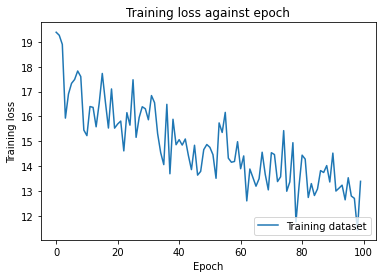

In [318]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['loss'])
plt.title('Training loss against epoch')
plt.ylabel('Training loss')
plt.xlabel('Epoch')
plt.legend(['Training dataset'], loc='lower right')
plt.show()

### Testing loss with different algorithms

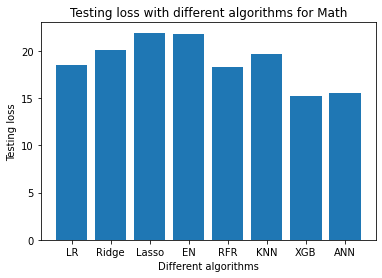

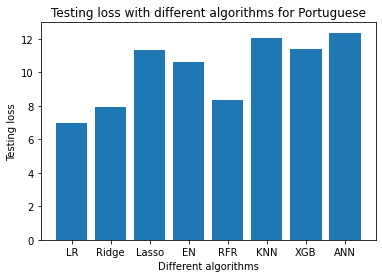

In [324]:
plt.bar(list(score_df1.keys()), score_df1.values())
plt.title('Testing loss with different algorithms for Math')
plt.ylabel('Testing loss')
plt.xlabel('Different algorithms')
plt.show()

plt.bar(list(score_df2.keys()), score_df2.values())
plt.title('Testing loss with different algorithms for Portuguese')
plt.ylabel('Testing loss')
plt.xlabel('Different algorithms')
plt.show()

### Feature importance from XGBoost

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

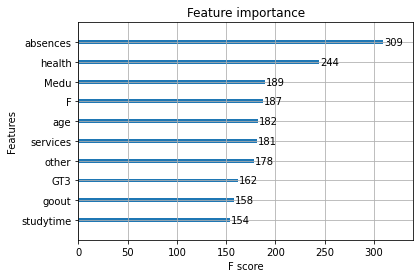

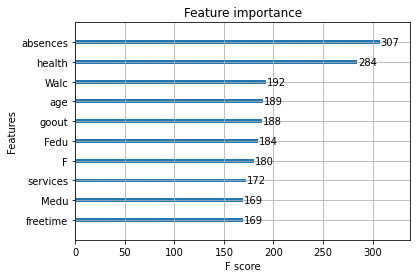

In [338]:
fit = XGBRegressor().fit(X_train_df1, y_train_df1)
fit.get_booster().feature_names = ['GP', 'MS', 'F', 'M', 'R', 'U', 'GT3', 'LE3', 'A', 'T', 'at_home', 'health', 'other', 'services', 
                                   'teacher', 'health', 'other', 'services', 'teacher', 'at_home', 'course', 'home', 'other', 'reputation', 
                                   'father', 'mother', 'other', 'schoolsup-no', 'schoolsup-yes', 'famsup-no', 'famsup-yes', 
                                   'paid-no', 'paid-yes', 'activities-no', 'activities-yes', 'nursery-no', 'nuresry-yes', 
                                   'higher-no', 'higher-yes', 'internet-no', 'internet-yes', 'romantic-no', 'romantic-yes', 
                                   'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 
                                   'Dalc', 'Walc', 'health', 'absences']
plot_importance(fit.get_booster(), max_num_features=10)

fit = XGBRegressor().fit(X_train_df2, y_train_df2)
fit.get_booster().feature_names = ['GP', 'MS', 'F', 'M', 'R', 'U', 'GT3', 'LE3', 'A', 'T', 'at_home', 'health', 'other', 'services', 
                                   'teacher', 'health', 'other', 'services', 'teacher', 'at_home', 'course', 'home', 'other', 'reputation', 
                                   'father', 'mother', 'other', 'schoolsup-no', 'schoolsup-yes', 'famsup-no', 'famsup-yes', 
                                   'paid-no', 'paid-yes', 'activities-no', 'activities-yes', 'nursery-no', 'nuresry-yes', 
                                   'higher-no', 'higher-yes', 'internet-no', 'internet-yes', 'romantic-no', 'romantic-yes', 
                                   'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 
                                   'Dalc', 'Walc', 'health', 'absences']
plot_importance(fit.get_booster(), max_num_features=10)

### Linear relationship between variables and output with linear regression

In [341]:
X_train_df2 = StandardScaler().fit_transform(X_train_df2)
clf = sm.OLS(y_train_df2, X_train_df2).fit()
feature_names = ['GP', 'MS', 'F', 'M', 'R', 'U', 'GT3', 'LE3', 'A', 'T', 'at_home', 'health', 'other', 'services', 
                                   'teacher', 'health', 'other', 'services', 'teacher', 'at_home', 'course', 'home', 'other', 'reputation', 
                                   'father', 'mother', 'other', 'schoolsup-no', 'schoolsup-yes', 'famsup-no', 'famsup-yes', 
                                   'paid-no', 'paid-yes', 'activities-no', 'activities-yes', 'nursery-no', 'nuresry-yes', 
                                   'higher-no', 'higher-yes', 'internet-no', 'internet-yes', 'romantic-no', 'romantic-yes', 
                                   'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 
                                   'Dalc', 'Walc', 'health', 'absences']
clf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.026
Model:                            OLS   Adj. R-squared (uncentered):             -0.054
Method:                 Least Squares   F-statistic:                             0.3245
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                        1.00
Time:                        01:32:41   Log-Likelihood:                         -2006.0
No. Observations:                 512   AIC:                                      4090.
Df Residuals:                     473   BIC:                                      4255.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3496      0.345      1.013      0.312      -0.329       1.028
x2            -0.3496      0.345     -1.013      0.312      -1.028       0.329
x3             0.1109      0.326      0.340      0.734      -0.529       0.751
x4            -0.1109      0.326     -0.340      0.734      -0.751       0.529
x5            -0.0474      0.319     -0.148      0.882      -0.675       0.580
x6             0.0474      0.319      0.148      0.882      -0.580       0.675
x7            -0.0596      0.301     -0.198      0.843      -0.650       0.531
x8             0.0596      0.301      0.198      0.843      -0.531       0.650
x9            -0.0313      0.306     -0.102      0.919      -0.633       0.570
x10            0.0313      0.306      0.102      0.919      -0.570       0.633
x11           -0.1370      0.513     -0.267      0.790      -1.146       0.872
x12            0.1470      0.569      0.258      0.796      -0.971       1.265
x13           -0.0536      0.426     -0.126      0.900      -0.890       0.783
x14            0.1024      0.463      0.221      0.825      -0.807       1.012
x15            0.0182      0.592      0.031      0.976      -1.146       1.182
x16            0.0837      0.534      0.157      0.876      -0.966       1.133
x17           -0.1087      0.573     -0.190      0.850      -1.235       1.018
x18            0.0035      0.373      0.009      0.993      -0.729       0.736
x19           -0.1532      0.407     -0.376      0.707      -0.954       0.647
x20            0.2782      0.571      0.487      0.627      -0.844       1.401
x21           -0.1175      0.382     -0.308      0.758      -0.868       0.633
x22            0.0403      0.437      0.092      0.927      -0.818       0.899
x23           -0.0459      0.518     -0.089      0.929      -1.064       0.972
x24            0.1333      0.460      0.290      0.772      -0.771       1.037
x25            0.0861      0.388      0.222      0.824      -0.675       0.848
x26           -0.0992      0.321     -0.309      0.758      -0.731       0.532
x27            0.0370      0.555      0.067      0.947      -1.054       1.128
x28            0.2524      0.302      0.837      0.403      -0.340       0.845
x29           -0.2524      0.302     -0.837      0.403      -0.845       0.340
x30            0.0272      0.299      0.091      0.928      -0.561       0.616
x31           -0.0272      0.299     -0.091      0.928      -0.616       0.561
x32            0.0040      0.294      0.013      0.989      -0.574       0.582
x33           -0.0040      0.294     -0.013      0.989      -0.582       0.574
x34           -0.1178      0.297     -0.396      0.692      -0.702       0.466
x35            0.1178      0.297      0.396      0.692      -

# Question 3

### Data preprocessing

In [410]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, plot_precision_recall_curve
from xgboost import XGBClassifier, plot_importance
import statsmodels.api as sm
from operator import itemgetter 


# Read dataset and drop column duration
df = pd.read_csv('bank-additional-full.csv', sep=';')
df = df.drop(['duration'], axis=1)

# Shift y to the last column
df = df[[col for col in df if col not in ['y']] + ['y']]

# Education transformation
category_mapping = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
df['education_unknown'] = np.where(df['education'] == 'unknown', 0, 1)

# Pdays transformation
df['not_contacted'] = np.where(df['pdays'] == 999, 0, 1)
df['pdays'] = df['pdays'].replace(999, -1)

# Encoding different columns
one_hot_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('y', OrdinalEncoder(), ['y']),
        ('education', OrdinalEncoder(categories=[category_mapping]), ['education']),
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), one_hot_cols),
    ],remainder='passthrough')

df = preprocessor.fit_transform(df)

# Shuffle dataset in case the order leaks information
df = shuffle(df)

# Train, test split 
df_train = df[:len(df)//10*9]
df_test = df[len(df)//10*9+1:]

X_train = df_train[:, 1:]
y_train = df_train[:, 0]

X_test = df_test[:, 1:]
y_test = df_test[:, 0]

score = {'baseline': 0.887}
ap_score = {'baseline': 0.113}

### Support Vector Machine

In [41]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
score['SVM'] = clf.score(X_test, y_test)
ap_score['SVM'] = average_precision_score(y_test, clf.predict(X_test))

### Random Forest Classifier

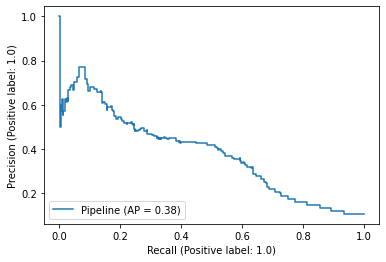

In [44]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
clf.fit(X_train, y_train)
score['RFC'] = clf.score(X_test, y_test)
ap_score['RFC'] = plot_precision_recall_curve(clf, X_test, y_test).average_precision

### Naive Bayes Classifier

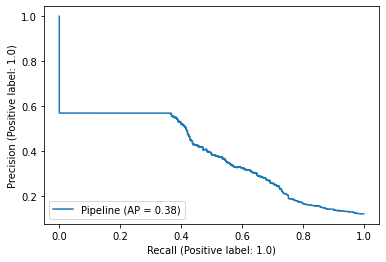

In [43]:
clf = make_pipeline(StandardScaler(), GaussianNB())
clf.fit(X_train, y_train)
score['NB'] = clf.score(X_test, y_test)
ap_score['NB'] = plot_precision_recall_curve(clf, X_test, y_test).average_precision

### Logistic Regression

D:\Anaconda\envs\mlfinlab\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'plt' is not defined

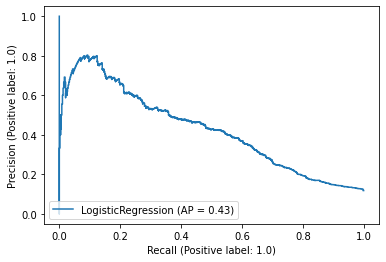

In [10]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(X_train, y_train)
score['LR'] = clf.score(X_test, y_test)
ap_score['LR'] = plot_precision_recall_curve(clf, X_test, y_test).average_precision
plt.title('Precision-Recall curve with logistic regression')
plt.plot()

### K Nearest Neighbours

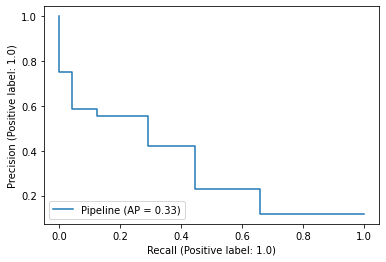

In [45]:
clf = make_pipeline(StandardScaler(), KNeighborsClassifier())
clf.fit(X_train, y_train)
score['KNN'] = clf.score(X_test, y_test)
ap_score['KNN'] = plot_precision_recall_curve(clf, X_test, y_test).average_precision

### XGBoost

D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


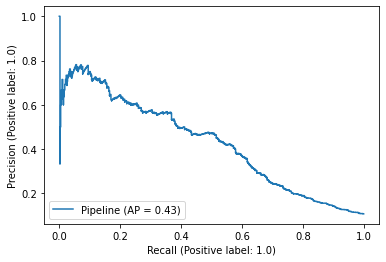

In [46]:
clf = make_pipeline(StandardScaler(), XGBClassifier())
clf.fit(X_train, y_train)
score['XGB'] = clf.score(X_test, y_test)
ap_score['XGB'] = plot_precision_recall_curve(clf, X_test, y_test).average_precision

### Artifical neural network

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam

# Network structure
model = Sequential()

model.add(Dense(input_dim=57, units=50, activation='relu', kernel_initializer="glorot_uniform"))
model.add(Dropout(0.5))
model.add(Dense(units=50, activation='relu', kernel_initializer="glorot_uniform"))
model.add(Dropout(0.5))
model.add(Dense(units=50, activation='relu', kernel_initializer="glorot_uniform"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='relu', kernel_initializer="glorot_uniform"))

# Compiling model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Fitting model
history = model.fit(X_train, y_train, batch_size=50, epochs=100)

# Evaluating model
score['ANN'] = model.evaluate(X_test, y_test)[1]

Epoch 1/100
742/742 [==============================] - 2s 1ms/step - loss: 8.6335 - accuracy: 0.4342: 0s - loss: 9.5530 - accuracy: 0.37 - ETA: 0s - l
Epoch 2/100
742/742 [==============================] - 1s 1ms/step - loss: 7.0085 - accuracy: 0.5410: 0s - loss: 7.1020 - accuracy: 0.
Epoch 3/100
742/742 [==============================] - 1s 2ms/step - loss: 2.5783 - accuracy: 0.8321: 0s - l
Epoch 4/100
742/742 [==============================] - 1s 1ms/step - loss: 2.0115 - accuracy: 0.8693
Epoch 5/100
742/742 [==============================] - 1s 1ms/step - loss: 1.9784 - accuracy: 0.8715: 0s - loss: 1.980
Epoch 6/100
742/742 [==============================] - 1s 1ms/step - loss: 1.9387 - accuracy: 0.8741: 0s - - ETA: 0s - loss: 1.9387 - accuracy: 0.
Epoch 7/100
742/742 [==============================] - 1s 1ms/step - loss: 1.8600 - accuracy: 0.8793
Epoch 8/100
742/742 [==============================] - 1s 1ms/step - loss: 1.9260 - accuracy: 0.8750
Epoch 9/100
742/742 [===============

### Accuracy with different algorithms

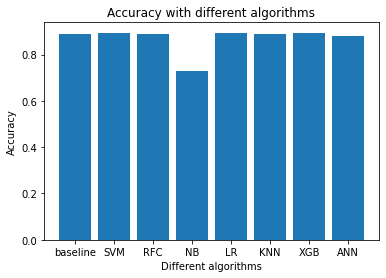

In [54]:
plt.bar(list(score.keys()), score.values())
plt.title('Accuracy with different algorithms')
plt.ylabel('Accuracy')
plt.xlabel('Different algorithms')
plt.show()

### Average-precision with different algorithms

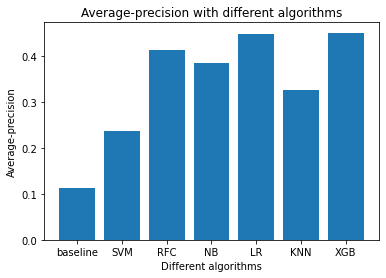

In [55]:
plt.bar(list(ap_score.keys()), ap_score.values())
plt.title('Average-precision with different algorithms')
plt.ylabel('Average-precision')
plt.xlabel('Different algorithms')
plt.show()

### Feature importance from XGBoost

[17:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

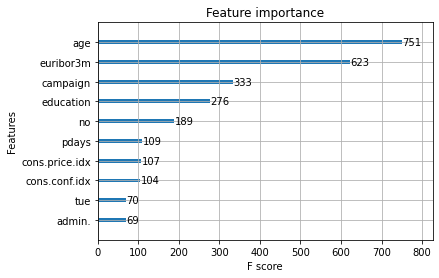

In [53]:
fit = XGBClassifier().fit(X_train, y_train)
fit.get_booster().feature_names = ['education', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 
            'services', 'student', 'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single', 'unknown', 'no', 
            'unknown', 'yes', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'cellular', 'telephone', 'apr', 'aug', 'dec', 'jul', 
            'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure', 'nonexistent', 'success', 'age', 
            'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
            'education_unknown', 'not_contacted']
plot_importance(fit.get_booster(), max_num_features=10)

### Linear relationship between variables and output with logistic regression

         Current function value: 0.636688
         Iterations: 35


D:\Anaconda\envs\mlfinlab\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<BarContainer object of 7 artists>

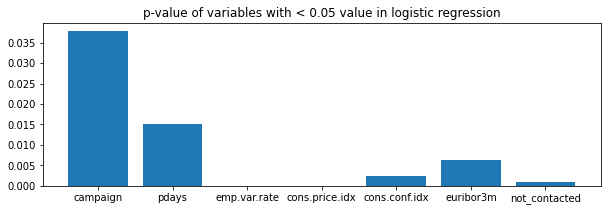

In [411]:
from operator import itemgetter 
X_train = StandardScaler().fit_transform(X_train)
clf = sm.Logit(y_train, X_train).fit()
feature_names = ['education', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 
            'services', 'student', 'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single', 'unknown', 'no', 
            'unknown', 'yes', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'cellular', 'telephone', 'apr', 'aug', 'dec', 'jul', 
            'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure', 'nonexistent', 'success', 'age', 
            'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
            'education_unknown', 'not_contacted']
plt.figure(figsize=(10,3))
plt.title('p-value of variables with < 0.05 value in logistic regression')
plt.bar(itemgetter(*[i for i,v in enumerate(clf.pvalues) if v < 0.05])(feature_names), clf.pvalues[[i for i,v in enumerate(clf.pvalues) if v < 0.05]])

In [414]:
clf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                37062
Model:                          Logit   Df Residuals:                    37011
Method:                           MLE   Df Model:                           50
Date:                Fri, 02 Apr 2021   Pseudo R-squ.:                 -0.8030
Time:                        03:09:08   Log-Likelihood:                -23597.
converged:                      False   LL-Null:                       -13088.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0174      0.017      1.006      0.314      -0.017       0.051
x2             0.0066    3.5e+05   1.89e-08      1.000   -6.85e+05    6.85e+05
x3            -0.0127   3.36e+05  -3.79e-08      1.000   -6.59e+05    6.59e+05
x4            -0.0086   1.47e+05  -5.83e-08      1.000   -2.89e+05    2.89e+05
x5            -0.0021   1.27e+05  -1.67e-08      1.000   -2.48e+05    2.48e+05
x6            -0.0047   2.05e+05  -2.28e-08      1.000   -4.02e+05    4.02e+05
x7             0.0306    1.6e+05   1.91e-07      1.000   -3.14e+05    3.14e+05
x8            -0.0027   1.47e+05  -1.82e-08      1.000   -2.87e+05    2.87e+05
x9            -0.0095   2.37e+05     -4e-08      1.000   -4.65e+05    4.65e+05
x10            0.0260   1.15e+05   2.25e-07      1.000   -2.26e+05    2.26e+05
x11           -0.0006   2.97e+05  -2.05e-09      1.000   -5.82e+05    5.82e+05
x12           -0.0033   1.25e+05  -2.64e-08      1.000   -2.45e+05    2.45e+05
x13           -0.0031   7.14e+04  -4.33e-08      1.000    -1.4e+05     1.4e+05
x14           -0.0054    3.8e+05  -1.42e-08      1.000   -7.45e+05    7.45e+05
x15           -0.0017   5.87e+05  -2.83e-09      1.000   -1.15e+06    1.15e+06
x16            0.0052   5.43e+05   9.64e-09      1.000   -1.06e+06    1.06e+06
x17            0.0034   5.38e+04   6.38e-08      1.000   -1.05e+05    1.05e+05
x18            0.0110        nan        nan        nan         nan         nan
x19           -0.0110        nan        nan        nan         nan         nan
x20           -0.0013        nan        nan        nan         nan         nan
x21            0.0030   2.58e+05   1.17e-08      1.000   -5.06e+05    5.06e+05
x22           -0.0029   8.95e+05  -3.24e-09      1.000   -1.75e+06    1.75e+06
x23           -0.0021   2.61e+05  -8.03e-09      1.000   -5.13e+05    5.13e+05
x24           -0.0007   7.16e+05  -9.77e-10      1.000    -1.4e+06     1.4e+06
x25           -0.0030   9.86e+05  -2.99e-09      1.000   -1.93e+06    1.93e+06
x26            0.0020   6.75e+05   2.96e-09      1.000   -1.32e+06    1.32e+06
x27            0.0807   1.61e+06   5.03e-08      1.000   -3.15e+06    3.15e+06
x28           -0.0807   9.34e+05  -8.65e-08      1.000   -1.83e+06    1.83e+06
x29           -0.0159   1.43e+05  -1.11e-07      1.000   -2.79e+05    2.79e+05
x30            0.1809   2.12e+05   8.55e-07      1.000   -4.15e+05    4.15e+05
x31            0.0463   3.92e+04   1.18e-06      1.000   -7.68e+04    7.68e+04
x32            0.0450   2.22e+05   2.03e-07      1.000   -4.34e+05    4.34e+05
x33           -0.1461   1.97e+05  -7.43e-07      1.000   -3.86e+05    3.86e+05
x34            0.1626   6.74e+04   2.41e-06      1.000   -1.32e+05    1.32e+05
x35           -0.0841   2.78e+05  -3.03e-07      1.000   -5.45e+05    5.45e+05
x36           -0.0370   1.77e+05  -2.09e-07      1.000   -3.47e+05    3.47e+05
x37           -0.0054   7.63e+04  -7.08e-08      1.000    -1.5e+05     1.5e+05
x38            0.0083   6.83e+04   1.21e-07      1.000   -1.34e+05    1.34e+05
x3

### Relationship between deposit and age

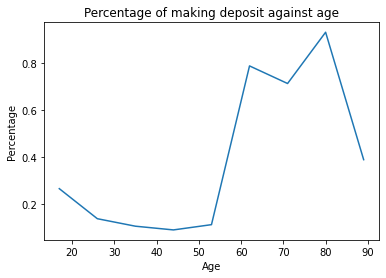

In [113]:
new_df = pd.DataFrame(data = {'col1': df['age'], 'col2': value})
percentage = np.histogram((new_df[new_df['col2'] != 0]['col1']), bins=9)[0] / np.histogram((new_df[new_df['col2'] == 0]['col1']), bins=9)[0]

plt.title('Percentage of making deposit against age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.plot([17., 26., 35., 44., 53., 62., 71., 80., 89], percentage)

### Grid Search Cross-Validation

In [199]:
from sklearn.model_selection import GridSearchCV

parameters = [{
'max_depth': [2,5,10,20], 
'min_child_weight': [5,15,300]}]

clf = GridSearchCV(XGBClassifier(), parameters, scoring='accuracy')
clf.fit(X_train, y_train)

pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\mlfinlab\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,max_depth,min_child_weight,Accuracy
0,2,5,0.900005
1,2,15,0.899601
2,2,300,0.899709
3,5,5,0.898980
4,5,15,0.898414
5,5,300,0.900167
6,10,5,0.895176
7,10,15,0.896687
8,10,300,0.900356
9,20,5,0.890130
